# Практическая работа № 3

Валерий Сергеевич Верхотуров
БСБО-05-20

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def multiplicative_method(a = 22_695_47, b = 1, m = 2 ** 64 - 1, x = 0):
    while True:
        if m > 2 ** 32:
            m = m % 2 ** 32
        else:
            break
    assert 0 <= a < m
    assert 0 <= b < m
    assert m >= 2
    assert 0 <= x < m
    while True:
        x = (a * x + b) % m
        yield x / m

## Задание 1

Создать функцию, описывающую распределение плотности вероятности для нормального закона распределения случайной величины. Построить графики плотности вероятности нормального закона с заданными значениями математического ожидания $M$ и среднеквадратичекого отклонения $\sigma$:
$M = 10$ и $\sigma = 2$,
$M = 10$ и $\sigma = 1$,
$M = 10$ и $\sigma = 0.5$,
$M = 12$ и $\sigma = 1$.

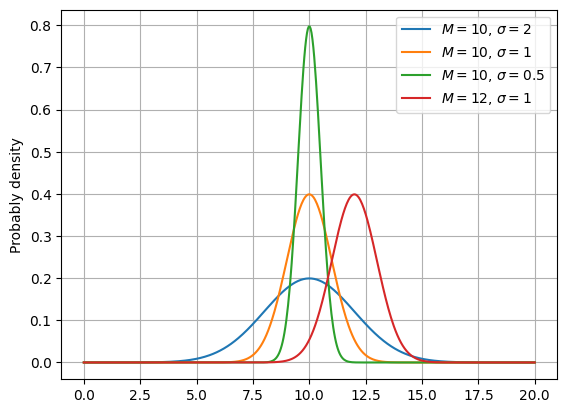

In [3]:
# def task_1_normal_distribution(x, mean, sigma):
#     return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / sigma) ** 2)

def task_1_plot_normal_distribution(mean, sigma):
    x = np.linspace(0, 20, 500)
    plt.plot(x, norm.pdf(x, loc = mean, scale = sigma),
             label=f'$M = {mean}$, $\sigma = {sigma}$')
    plt.legend()
    plt.grid(True)
    plt.ylabel('Probably density')

def task_1():
    input_data = [
        (10, 2),
        (10, 1),
        (10, 0.5),
        (12, 1)
    ]
    for mean, sigma in input_data:
        task_1_plot_normal_distribution(mean, sigma)
    plt.show()

task_1()

# Задание 2

Описать функцию распределения для нормального закона с параметрами $M = 10$ и $\sigma = 2$ и построить ее график на интеравале от 0 до 20.

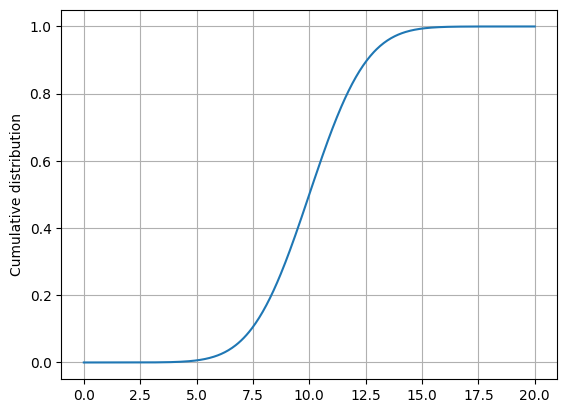

In [4]:
def task_2_cdf(mean, sigma, start_x, end_x):
    x = np.linspace(start_x, end_x, 500)
    y = norm.cdf(x, mean, sigma)
    plt.plot(x, y)
    plt.ylabel('Cumulative distribution')
    plt.grid(True)

def task_2():
    mean = 10
    sigma = 2
    start_x = 0
    end_x = 20
    task_2_cdf(mean, sigma, start_x, end_x)
    plt.show()

task_2()

# Задания 3, 4

Для получения функции распределения провести моделирование нормального закона распределения с помощью метода обратной функции. Для моделирования равномерно распределенной величины использовать `multiplicative_method`. Для предоставления обратной функции использовать кусочно-линейную аппроксимацию для 100 равномерных участков в интервале от 0 до 20. Число экспериментов для моделирования принять равным $N = 10^3, 10^4, 10^5, 10^6$.

Построить гистограммы для полученной последовательности случайных чисел на 100 интервалах и для числа экспериментов $N = 10^3, 10^4, 10^5, 10^6$.

First 10 elements of y [ 2.24568747 12.92140107 11.78381858  8.27459388  9.48838501  7.90068117
  8.68449432  9.39292311 11.82817173  8.83317136]


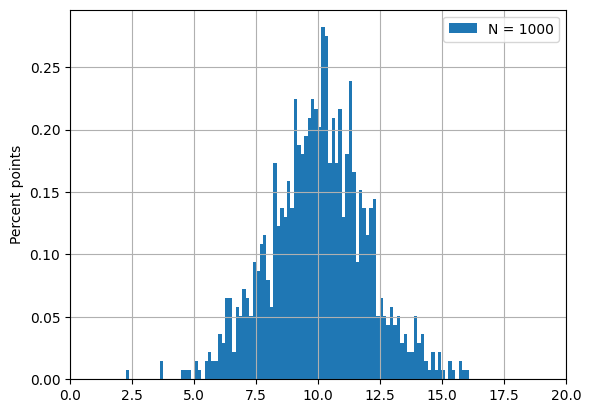

First 10 elements of y [11.18836662  5.80741131  9.96744991  9.62566363  8.83157739  7.16458497
  6.92212016  9.8968836   9.68285841  6.18500943]


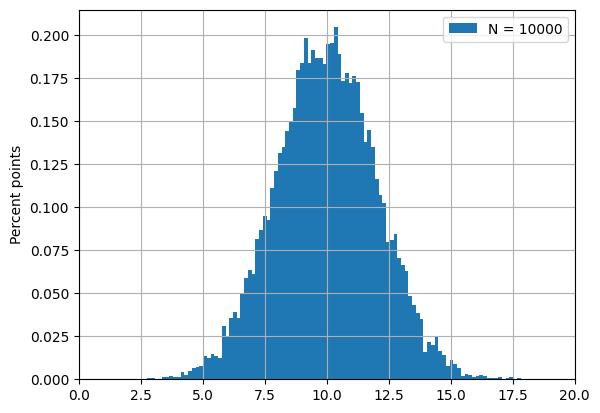

First 10 elements of y [10.44107134 10.93518391  8.60857376  9.68966701 10.75942126 10.67349859
 10.40034351 10.33120363 12.5022494  11.46262967]


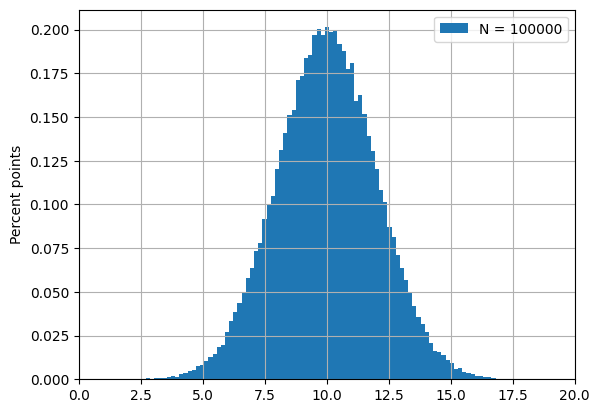

First 10 elements of y [10.34150873 10.48557123  9.60065799 12.08932906  4.923429    6.58734394
 13.29330922 10.42441048 10.94916652  9.80934403]


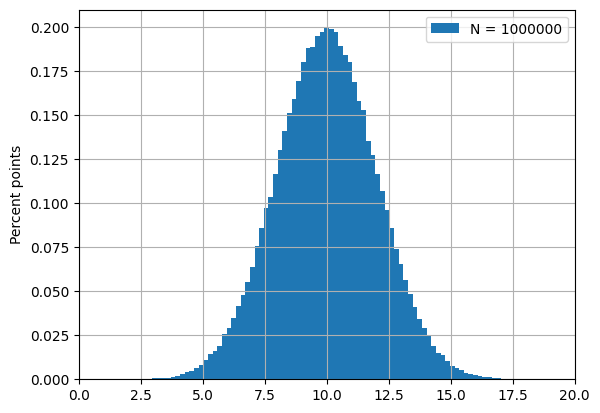

In [5]:
def task_3_4():
    mean = 10
    sigma = 2
    start_x = 0
    end_x = 20
    experiments = [10 ** 3, 10 ** 4, 10 ** 5, 10 ** 6]
    parts = 100

    multiplicative_generator = multiplicative_method(x=0.1)
    for experiment in experiments:
        y = norm.ppf(
            [next(multiplicative_generator) for _ in range(experiment)],
            mean,
            sigma)
        print("First 10 elements of y", y[:10])

        plt.hist(y, bins=parts, density=True, label=f'N = {experiment}')
        plt.legend()
        plt.ylabel('Percent points')
        plt.xlim([start_x, end_x])
        plt.grid(True)
        plt.show()

task_3_4()
